In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import math
%matplotlib inline

In [100]:
df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

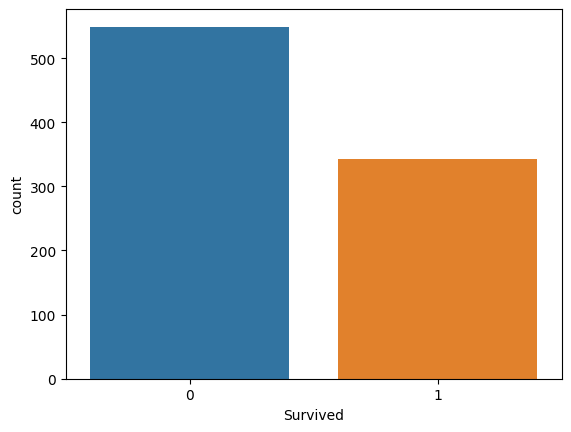

In [101]:
sns.countplot(x="Survived", data= df)

<Axes: xlabel='Survived', ylabel='count'>

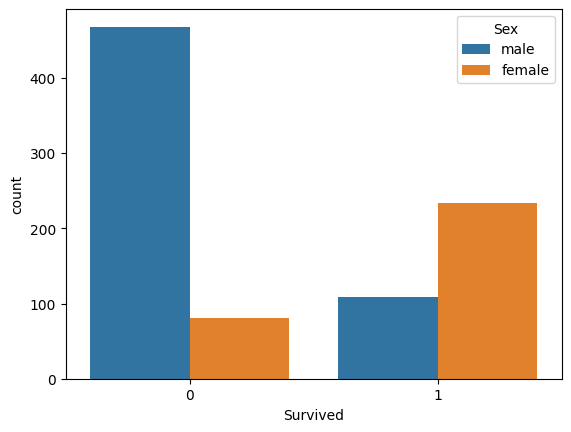

In [102]:
sns.countplot(x="Survived",hue="Sex", data= df)

<Axes: ylabel='Frequency'>

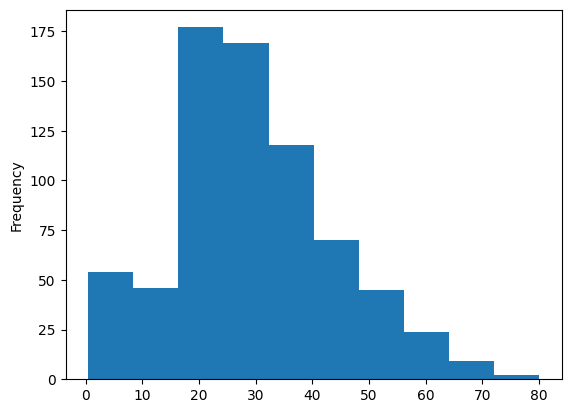

In [103]:
df["Age"].plot.hist()


<Axes: ylabel='Frequency'>

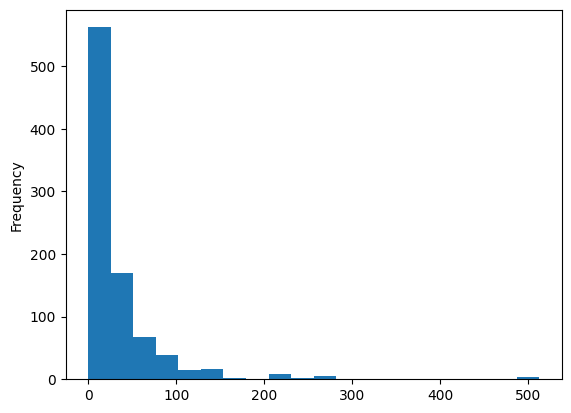

In [104]:
df["Fare"].plot.hist(bins=20)

# Data Wrangling

In [105]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

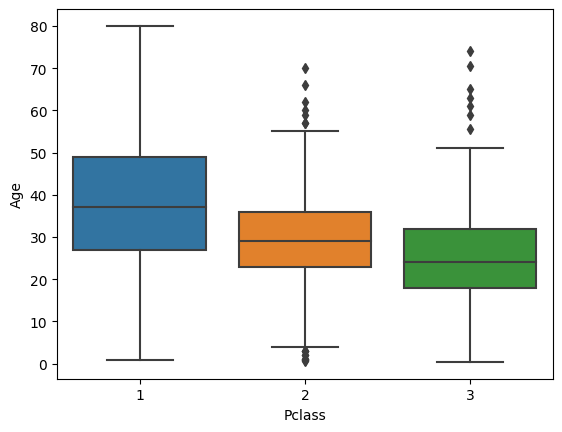

In [106]:
sns.boxplot(x="Pclass", y="Age", data=df )

In [107]:
df.drop("Cabin", axis=1, inplace=True)

In [108]:
df.dropna(inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [109]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [110]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [111]:
embarked=pd.get_dummies(df['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [112]:
pclass=pd.get_dummies(df['Pclass'], drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [113]:
df = pd.concat([df,sex,pclass,embarked],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [114]:
df.drop(["Name","Pclass","PassengerId","Ticket","Sex","Embarked"], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Model Build,Train,Test

In [121]:
# Split the predictors and target variables
df = df.rename(columns={col: str(col) for col in df.columns})
x=df.drop('Survived', axis=1)
y=df['Survived']

In [122]:
# split the test and training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

x_train

,Age,SibSp,Parch,Fare,male,2,3,Q,S
867,31.0,0,0,50.4958,1,0,0,0,1
332,38.0,0,1,153.4625,1,0,0,0,1
20,35.0,0,0,26.0000,1,1,0,0,1
606,30.0,0,0,7.8958,1,0,1,0,1
379,19.0,0,0,7.7750,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,0,1,1,0
239,33.0,0,0,12.2750,1,1,0,0,1
791,16.0,0,0,26.0000,1,1,0,0,1
705,39.0,0,0,26.0000,1,1,0,0,1


In [123]:
# build the model

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predictions = reg.predict(x_test)

<Axes: >

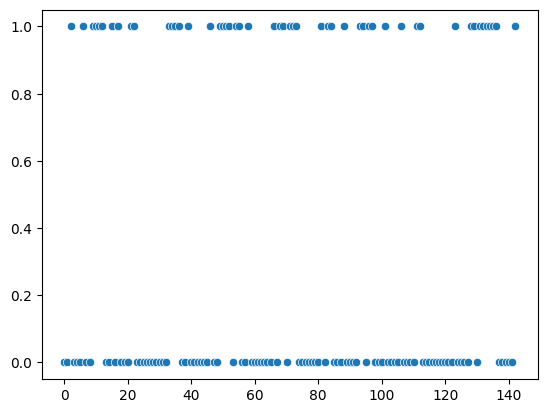

In [126]:
sns.scatterplot(predictions)

In [128]:
# model classification report

from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85        82\n           1       0.84      0.70      0.77        61\n\n    accuracy                           0.82       143\n   macro avg       0.82      0.80      0.81       143\nweighted avg       0.82      0.82      0.82       143\n'

In [130]:
# model evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[74,  8],
       [18, 43]])

In [132]:
# accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8181818181818182